In [ ]:
# Kiểm tra GPU và thư viện
!nvidia-smi
!pip install ultralytics --upgrade
!pip install matplotlib

from ultralytics import YOLO
import os, shutil
from IPython.display import Image, display

Tue Oct 28 11:49:07 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA A100-SXM4-80GB          Off |   00000000:00:05.0 Off |                    0 |
| N/A   33C    P0             53W /  400W |       5MiB /  81920MiB |      0%      Default |
|                                         |                        |             Disabled |
+-----------------------------------------+-----

In [ ]:
import torch
print(torch.cuda.is_available())
print(torch.cuda.get_device_name(0))


True
NVIDIA A100-SXM4-80GB


In [ ]:
!fusermount -u /content/drive
!rm -rf /content/drive
from google.colab import drive
drive.mount('/content/drive')


fusermount: failed to unmount /content/drive: Invalid argument
Mounted at /content/drive


In [ ]:
from ultralytics import YOLO
import torch

# Kiểm tra GPU
assert torch.cuda.is_available(), "❌ GPU chưa được bật. Vào Runtime > Change runtime type > GPU."
print("✅ Đang dùng GPU:", torch.cuda.get_device_name(0))

# Đường dẫn dataset (đã copy về /content cho nhanh)
data_path = data_path = '/content/drive/MyDrive/Fire Smoke and Human Detector.v32i.yolov8/data.yaml'

save_dir = '/content/drive/MyDrive/YOLO_Results'

# Khởi tạo và train
model = YOLO('yolov8m.pt')
results = model.train(
    data=data_path,
    epochs=100,
    imgsz=640,
    batch=32,
    workers=4,
    device=0,       # đảm bảo chạy GPU
    cache=False,
    pretrained=True,
    project=save_dir,
    name='train_run',
    resume=False
)


✅ Đang dùng GPU: NVIDIA A100-SXM4-80GB
Ultralytics 8.3.221 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (NVIDIA A100-SXM4-80GB, 81222MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=32, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/Fire Smoke and Human Detector.v32i.yolov8/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8m.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train_run, nbs=64, nms=False, opset=None, 

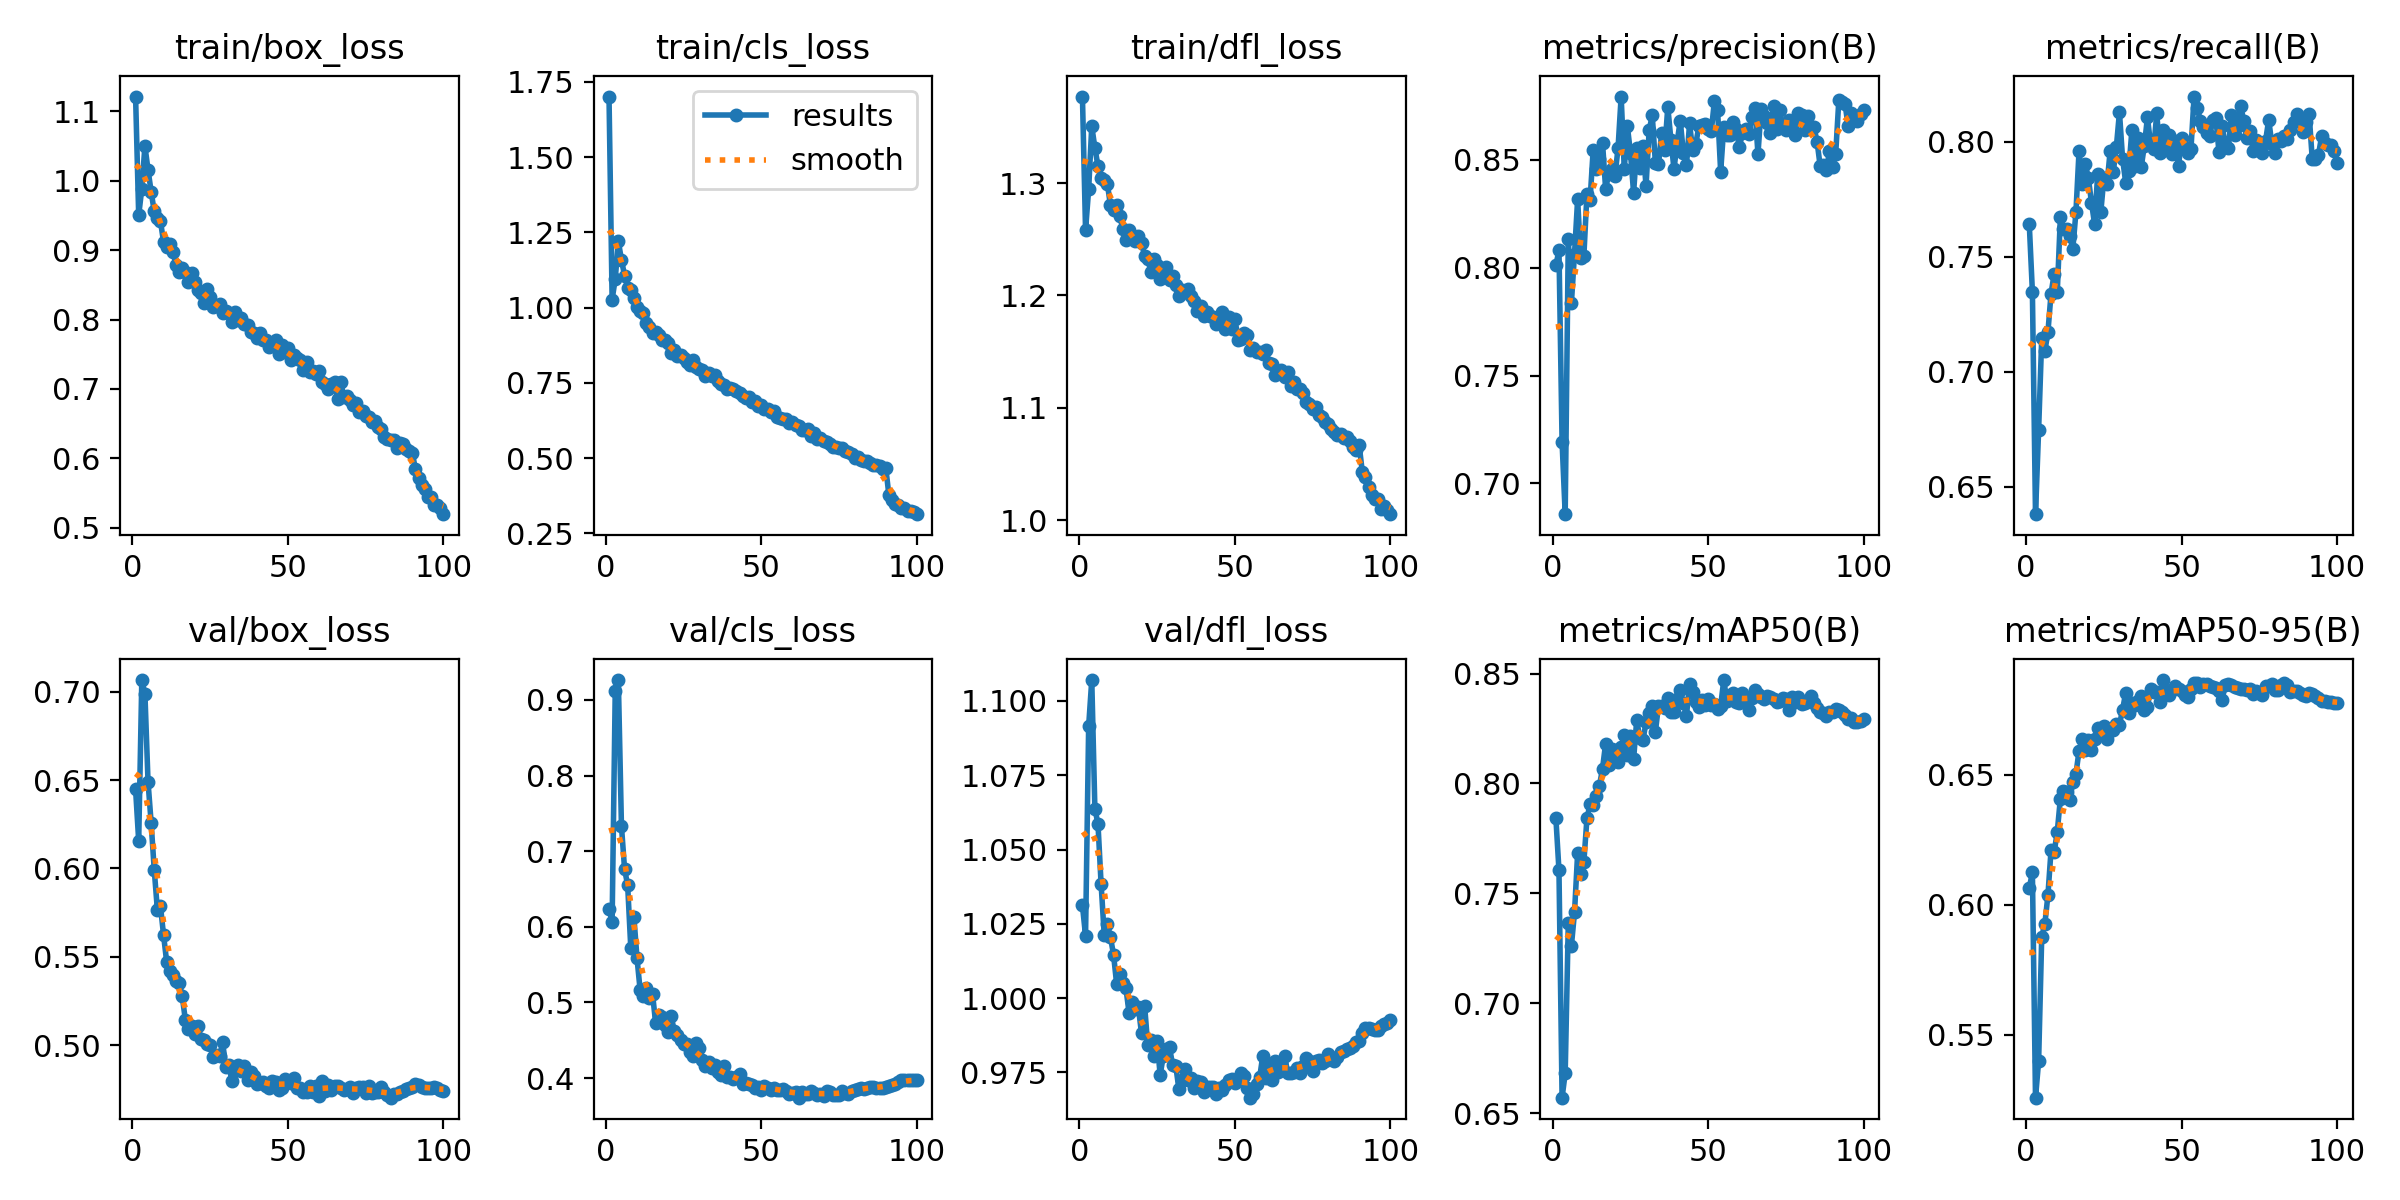

In [ ]:
import os
from IPython.display import Image, display

# Hiển thị biểu đồ kết quả sau khi train
result_img = os.path.join(save_dir, 'train_run', 'results.png')
if os.path.exists(result_img):
    display(Image(filename=result_img))
else:
    print("⚠️ Chưa thấy file biểu đồ results.png, có thể train chưa hoàn tất.")
